# Essex County, NJ, 2000-2015

**PLANNER APLICANT EXERCISE - Dana Chermesh Reshef for RPA** <br>
Author: Dana Chermesh Reshef <br>
July 2018

This analysis aims to observe and assess the changes of **_Essex County, NJ_**, from 2000 to 2015 in terms of its demographics, economic and housing market, using census data that were obtained from the American Fact Finder tool. The study showed a ___ in demographics, suggesting on ___ and even more ,,, when considering the trend in New-Jersey for the same time period. Possible implications could be to inform policy makers about zonings, capital investments, transportations etc.

----

# [Census Data API User Guide](https://www.census.gov/content/dam/Census/data/developers/api-user-guide/api-guide.pdf)

The Census Data API in an API that gives the public access to raw statistical data from various Census Bureau data
programs. In terms of space, we aggregate the data and usually associate them with a
certain Census geographic boundary/area defined by a FIPS code. 

## _get your API key from:_ 
https://api.census.gov/data/key_signup.html

**Recommended:** In order to keep your API key confidential, please save your API key in a .py file named **censusAPI.py** as follows:

```python
myAPI = 'XXXXXXXXXXXXXXX'
```
Then read into this notebook as in the following cell:
```python
from censusAPI import myAPI
```

### The complete list of all available datasets for the API is located here:
https://api.census.gov/data.html

----

# 0. Improts

In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pylab as pl
import seaborn as sns
sns.set_style('whitegrid')

%pylab inline

# reading in my api key saved in censusAPI.py as
# myAPI = 'XXXXXXXXXXXXXXX'
from censusAPI import myAPI

Populating the interactive namespace from numpy and matplotlib


# 1. Data
# 1.1 Population and demographics
## _Census Bureau Decennial Census 2000 + PEP 2015_
Source: _U.S. Census Bureau Decennial Census 2000; U.S. Census Bureau Population Estimates Program 2015_
 

## _Obtaining data for 2000, from the SF3 survey, for Essex county and NJ state_
Variables to be obtained:
- Total pop
- Race 
- Age groups
- Employment
- Median income
- Income groups? (share of LI households)
- Migration of LI household? other income groups?
- Housing by tenure (% renters)
- Median homevalue and Median Rent
- Collage %

In [2]:
# Essex county 2000

pop00 = pd.read_json('https://api.census.gov/data/2000/sf3?get=P001001,'+
                     'H001001,H007002,H007003,H015002,H015003,'+
                     'P019024,P019046,P006002,P006003,P006004,P006005,'+
                     'P052002,P052003,P052004,P052005,'+
                     'P052006,P052007,P052008,P052009,P052010,'+
                     'P052011,P052012,P052013,P052014,P052015,'+
                     'P052016,P052017,PCT045001,P037015,P037032,'+
                     'H062001,H076001,H069007,H069008,H069009,H069010,'+
                     'NAME&for=county:013&in=state:34&key='+myAPI)

pop00.columns = pop00.iloc[0]
pop00 = pop00[1:].set_index(['NAME'])

pop00.columns = ['TotalPop', 'TotalHU','HU_owned', 'HU_rented',
                 'Pop_HU_owned', 'Pop_HU_rented', '18-64', '65+',
                 'White', 'Black', 'Indian', 'Asian',
                 'inc1', 'inc2', 'inc3','inc4','inc5',
                 'inc6', 'inc7', 'inc8', 'inc9','inc10','inc11',
                 'inc12', 'inc13', 'inc14', 'inc15','inc16', 'medInc',
                 'bachelorM', 'bachelorF', 'rent', 'homeVal','rentBurden30',
                 'rentBurden35', 'rentBurden40', 'rentBurden50',
                 'state','county']


print(pop00.shape)
pop00.head()

(1, 39)


,TotalPop,TotalHU,HU_owned,HU_rented,Pop_HU_owned,Pop_HU_rented,18-64,65+,White,Black,...,bachelorM,bachelorF,rent,homeVal,rentBurden30,rentBurden35,rentBurden40,rentBurden50,state,county
NAME,,,,,,,,,,,,,,,,,,,,,
Essex County,793633,301011,129489,154247,401157,369701,492818,94827,352937,325185,...,39049,45904,154124,208400,12048,7649,9748,31630,34,013


In [3]:
# NJ state 2000

NJ00 = pd.read_json('https://api.census.gov/data/2000/sf3?get=P001001,'+
                     'H001001,H007002,H007003,H015002,H015003,'+
                     'P019024,P019046,P006002,P006003,P006004,P006005,'+
                     'P052002,P052003,P052004,P052005,'+
                     'P052006,P052007,P052008,P052009,P052010,'+
                     'P052011,P052012,P052013,P052014,P052015,'+
                     'P052016,P052017,PCT045001,P037015,P037032,'+
                     'H062001,H076001,H069007,H069008,H069009,H069010,'+
                     'NAME&for=state:34&key='+myAPI)

NJ00.columns = NJ00.iloc[0]
NJ00 = NJ00[1:].set_index(['NAME'])

NJ00.columns = ['TotalPop', 'TotalHU','HU_owned', 'HU_rented',
                 'Pop_HU_owned', 'Pop_HU_rented', '18-64', '65+',
                 'White', 'Black', 'Indian', 'Asian',
                 'inc1', 'inc2', 'inc3','inc4','inc5',
                 'inc6', 'inc7', 'inc8', 'inc9','inc10','inc11',
                 'inc12', 'inc13', 'inc14', 'inc15','inc16', 'medInc',
                 'bachelorM', 'bachelorF', 'rent', 'homeVal','rentBurden30',
                 'rentBurden35', 'rentBurden40', 'rentBurden50',
                 'state']
# total HU
# homeVal

print(NJ00.shape)
NJ00.head()

(1, 38)


,TotalPop,TotalHU,HU_owned,HU_rented,Pop_HU_owned,Pop_HU_rented,18-64,65+,White,Black,...,medInc,bachelorM,bachelorF,rent,homeVal,rentBurden30,rentBurden35,rentBurden40,rentBurden50,state
NAME,,,,,,,,,,,,,,,,,,,,,
New Jersey,8414350,3310275,2011298,1053347,5726947,2492489,5219841,1113035,6099439,1127266,...,35416,518542,545123,1049127,170800,79665,54656,70640,188850,34


### merging NJ and Essex 

In [4]:
POP00 = pop00.T.merge(NJ00.T, how='left', left_index=True, right_index=True).T

print(POP00.shape)
POP00

(2, 39)


,TotalPop,TotalHU,HU_owned,HU_rented,Pop_HU_owned,Pop_HU_rented,18-64,65+,White,Black,...,bachelorM,bachelorF,rent,homeVal,rentBurden30,rentBurden35,rentBurden40,rentBurden50,state,county
NAME,,,,,,,,,,,,,,,,,,,,,
Essex County,793633,301011,129489,154247,401157,369701,492818,94827,352937,325185,...,39049,45904,154124,208400,12048,7649,9748,31630,34,013
New Jersey,8414350,3310275,2011298,1053347,5726947,2492489,5219841,1113035,6099439,1127266,...,518542,545123,1049127,170800,79665,54656,70640,188850,34,NaN


### munging:
- Income to income groups
- Bachelor M+F
- rent burden > 30%

In [5]:
POP00 = POP00.fillna(0).astype(int)
POP00.dtypes

TotalPop         int64
TotalHU          int64
HU_owned         int64
HU_rented        int64
Pop_HU_owned     int64
Pop_HU_rented    int64
18-64            int64
65+              int64
White            int64
Black            int64
Indian           int64
Asian            int64
inc1             int64
inc2             int64
inc3             int64
inc4             int64
inc5             int64
inc6             int64
inc7             int64
inc8             int64
inc9             int64
inc10            int64
inc11            int64
inc12            int64
inc13            int64
inc14            int64
inc15            int64
inc16            int64
medInc           int64
bachelorM        int64
bachelorF        int64
rent             int64
homeVal          int64
rentBurden30     int64
rentBurden35     int64
rentBurden40     int64
rentBurden50     int64
state            int64
county           int64
dtype: object

In [6]:
POP00['bachelor'] = POP00['bachelorM']+POP00['bachelorF']
POP00 = POP00.drop(['bachelorM', 'bachelorF'], axis=1)

POP00

,TotalPop,TotalHU,HU_owned,HU_rented,Pop_HU_owned,Pop_HU_rented,18-64,65+,White,Black,...,medInc,rent,homeVal,rentBurden30,rentBurden35,rentBurden40,rentBurden50,state,county,bachelor
NAME,,,,,,,,,,,,,,,,,,,,,
Essex County,793633,301011,129489,154247,401157,369701,492818,94827,352937,325185,...,29461,154124,208400,12048,7649,9748,31630,34,13,84953
New Jersey,8414350,3310275,2011298,1053347,5726947,2492489,5219841,1113035,6099439,1127266,...,35416,1049127,170800,79665,54656,70640,188850,34,0,1063665


### Exporting to .csv

In [7]:
POP00.T.to_csv('POP00.csv')

## ACS 1-year supplemental estimates for 2015
Obtained for county and state level.
- [variables](https://api.census.gov/data/2015/acs/acsse/variables.html)
- [examples](https://api.census.gov/data/2015/acs/acsse/examples.html)

In [8]:
# Essex county 2015

pop15 = pd.read_json('https://api.census.gov/data/2015/acs/acsse?get=K200101_001E,'+
                     'K202501_001E,K202502_002E,K202502_003E,K202503_002E,K202503_003E,'+
                     'K200104_003E,K200104_004E,K200104_005E,K200104_006E,K200104_007E,'+
                     'K200104_008E,K200201_002E,K200201_003E,K200201_004E,'+
                     'K200201_005E,K201901_002E,K201901_003E,K201901_004E,'+
                     'K201901_005E,K201901_006E,K201901_007E,K201901_008E,'+
                     'K201902_001E,K201501_007E,'+
                     'K202511_001E,K202510_001E,'+
                     'NAME&for=county:013&in=state:34&key='+myAPI)

pop15.columns = pop15.iloc[0]
pop15 = pop15[1:].set_index(['NAME'])

pop15.columns = ['TotalPop', 'TotalHU', 'HU_owned', 'HU_rented',
                 'Pop_HU_owned', 'Pop_HU_rented', '18-24', 
                 '25-34', '35-44', '45-54', '55-64', '65+',
                 'White', 'Black', 'Indian', 'Asian',
                 'inc0', 'inc1', 'inc2', 'inc3','inc4','inc5',
                 'inc6', 'medInc','bachelor', 'rent', 'homeVal',
                 'state','county']


print(pop15.shape)
pop15.head()

(1, 29)


,TotalPop,TotalHU,HU_owned,HU_rented,Pop_HU_owned,Pop_HU_rented,18-24,25-34,35-44,45-54,...,inc3,inc4,inc5,inc6,medInc,bachelor,rent,homeVal,state,county
NAME,,,,,,,,,,,,,,,,,,,,,
"Essex County, New Jersey",797434,314750,118393,161481,370758,405609,74363,108115,112679,114937,...,48922,33097,16974,28137,52041,111450,1075,375900,34,013


In [9]:
# Essex county 2015

NJ15 = pd.read_json('https://api.census.gov/data/2015/acs/acsse?get=K200101_001E,'+
                     'K202501_001E,K202502_002E,K202502_003E,K202503_002E,K202503_003E,'+
                     'K200104_003E,K200104_004E,K200104_005E,K200104_006E,K200104_007E,'+
                     'K200104_008E,K200201_002E,K200201_003E,K200201_004E,'+
                     'K200201_005E,K201901_002E,K201901_003E,K201901_004E,'+
                     'K201901_005E,K201901_006E,K201901_007E,K201901_008E,'+
                     'K201902_001E,K201501_007E,'+
                     'K202511_001E,K202510_001E,'+
                     'NAME&for=state:34&key='+myAPI)

NJ15.columns = NJ15.iloc[0]
NJ15 = NJ15[1:].set_index(['NAME'])

NJ15.columns = ['TotalPop', 'TotalHU', 'HU_owned', 'HU_rented',
                 'Pop_HU_owned', 'Pop_HU_rented', '18-24', 
                 '25-34', '35-44', '45-54', '55-64', '65+',
                 'White', 'Black', 'Indian', 'Asian',
                 'inc0', 'inc1', 'inc2', 'inc3','inc4','inc5',
                 'inc6', 'medInc','bachelor', 'rent', 'homeVal',
                 'state']


print(NJ15.shape)
NJ15.head()

(1, 28)


,TotalPop,TotalHU,HU_owned,HU_rented,Pop_HU_owned,Pop_HU_rented,18-24,25-34,35-44,45-54,...,inc2,inc3,inc4,inc5,inc6,medInc,bachelor,rent,homeVal,state
NAME,,,,,,,,,,,,,,,,,,,,,
New Jersey,8958013,3593722,2009034,1178929,5749063,3022937,792764,1151980,1168897,1323526,...,431004,676025,542923,275874,346484,72222,1437307,1214,322600,34


### merging NJ + Essex POP15

In [10]:
POP15 = pop15.T.merge(NJ15.T, how='left', left_index=True, right_index=True).T

print(POP15.shape)
POP15

(2, 29)


,TotalPop,TotalHU,HU_owned,HU_rented,Pop_HU_owned,Pop_HU_rented,18-24,25-34,35-44,45-54,...,inc3,inc4,inc5,inc6,medInc,bachelor,rent,homeVal,state,county
NAME,,,,,,,,,,,,,,,,,,,,,
"Essex County, New Jersey",797434,314750,118393,161481,370758,405609,74363,108115,112679,114937,...,48922,33097,16974,28137,52041,111450,1075,375900,34,013
New Jersey,8958013,3593722,2009034,1178929,5749063,3022937,792764,1151980,1168897,1323526,...,676025,542923,275874,346484,72222,1437307,1214,322600,34,NaN


### Exporting to .csv

In [11]:
POP15.T.to_csv('POP15.csv')

----

# 1.2 Housing Permits -- **_not included in the paper_ 
## _Census Bureau [Building Permits Survey](https://www.census.gov/construction/bps/)_
The data were retrieved from the Census Bureau [Building Permits Survey](https://www.census.gov/construction/bps/), under [Permits by State - Annual](https://www.census.gov/construction/bps/stateannual.html) and [Permits by County or Place](http://www2.census.gov/econ/bps).

For downloading the data for States and Counties, please go to the [Permits by State, Housing Units for 2015](https://www.census.gov/construction/bps/txt/tb2u2015.txt), or [County/](https://www2.census.gov/econ/bps/County/), and choose the [	co2015a.txt](https://www2.census.gov/econ/bps/County/co2015a.txt) dataset.

Data can be read directly to this notebook via https://www2.census.gov/econ/bps/County/co2015a.txt (_County_) using pandas `read_table`, then needed to clean to account **Essex County** only.

In [26]:
# Essex 2000-2015 permits

tablesCO = ['co2015a', 'co2014a','co2013a', 'co2012a', 
            'co2011a', 'co2010a','co2009a', 'co2008a',
            'co2007a', 'co2006a','co2005a', 'co2004a',
            'co2003a', 'co2002a','co2001a', 'co2000a']

COdata = []

for year in tablesCO:
    df = 'co'+year

    df = pd.read_table('https://www2.census.gov/econ/bps/County/co2017a.txt', 
            header=0, sep=r'\,|\t', engine='python').iloc[:,:18]

    df.columns = df.iloc[0]
    df = df[1:].set_index(['Name'])

    df = df.drop(['Code','Bldgs', 'Value'], axis=1)
    df.columns = ['State', 'County', '1unit', '2unit', '3-4unit', '+5unit']
    
    df = df[df['State'] == '34']
    df = df[df['County'] =='013']
    
    df = df.astype(int)
    df['1-2units'] = df['1unit'] + df['2unit']
    df['+3units'] = df['3-4unit'] + df['+5unit']
    df = df.drop(['1unit', '2unit', '3-4unit', '+5unit'], axis=1)

    df['State'] = df['State'].apply(lambda x: '{0:0>2}'.format(x))
    df['County'] = df['County'].apply(lambda x: '{0:0>3}'.format(x))

    df['STCO'] = df[['State', 'County']].apply(lambda x: ''.join(x), axis=1)
    COdata.append(df)

COall = pd.concat(COdata).groupby('STCO').sum()
print(COall.shape)
print(COall.dtypes)
COall.head()

(1, 2)
1-2units    int64
+3units     int64
dtype: object


,1-2units,+3units
STCO,,
34013,6736,30336


In [27]:
# NJ 2000-2015 permits

tablesCO = ['co2015a', 'co2014a','co2013a', 'co2012a', 
            'co2011a', 'co2010a','co2009a', 'co2008a',
            'co2007a', 'co2006a','co2005a', 'co2004a',
            'co2003a', 'co2002a','co2001a', 'co2000a']

NJdata = []

for year in tablesCO:
    df = 'co'+year

    df = pd.read_table('https://www2.census.gov/econ/bps/County/co2017a.txt', 
            header=0, sep=r'\,|\t', engine='python').iloc[:,:18]

    df.columns = df.iloc[0]
    df = df[1:].set_index(['Name'])

    df = df.drop(['Code','Bldgs', 'Value'], axis=1)
    df.columns = ['State', 'County', '1unit', '2unit', '3-4unit', '+5unit']
    
    df = df[df['State'] == '34']
    
    df = df.astype(int)
    df['1-2units'] = df['1unit'] + df['2unit']
    df['+3units'] = df['3-4unit'] + df['+5unit']
    df = df.drop(['1unit', '2unit', '3-4unit', '+5unit'], axis=1)

    df['State'] = df['State'].apply(lambda x: '{0:0>2}'.format(x))
    df['County'] = df['County'].apply(lambda x: '{0:0>3}'.format(x))

    df['STCO'] = df[['State', 'County']].apply(lambda x: ''.join(x), axis=1)
    NJdata.append(df)

NJpermits = pd.concat(NJdata).groupby('STCO').sum()
print(NJpermits.shape)
print(NJpermits.dtypes)
NJpermits.head()

(21, 2)
1-2units    int64
+3units     int64
dtype: object


,1-2units,+3units
STCO,,
34001,4896,12544
34003,16144,31872
34005,12496,5632
34007,3136,19264
34009,11648,1296


----

# 1.3 Economics
## [U.S. Bureau of Labor Statistics QCEW NAICS-Based Data](https://www.bls.gov/cew/datatoc.htm)

Data were download for counties and the _Essex County_ is reading in this notebook.

### Essex County total employment 2000, 2015, change

In [28]:
jobsEssex = pd.read_csv("2015.annual 34013 Essex County, New Jersey.csv")
jobsEssex00 = pd.read_csv("2000.annual 34013 Essex County, New Jersey.csv")

print(jobsEssex.shape)
print(list(jobsEssex.columns))

jobsEssex15 = pd.DataFrame(jobsEssex.T.loc['annual_avg_emplvl'])[:1]
jobsEssex00 = pd.DataFrame(jobsEssex00.T.loc['annual_avg_emplvl'])[:1]

jobsEssex = pd.concat([jobsEssex15,jobsEssex00]).T
jobsEssex.columns = ['2015', '2000']
jobsEssex['00-15_NET'] = jobsEssex['2015'] - jobsEssex['2000']
jobsEssex['00-15_%'] = (jobsEssex['2015'] - jobsEssex['2000'])/jobsEssex['2000']

jobsEssex.rename(index={'annual_avg_emplvl':'Essex'}, inplace=True)

jobsEssex

(2017, 43)
['area_fips', 'own_code', 'industry_code', 'agglvl_code', 'size_code', 'year', 'qtr', 'disclosure_code', 'area_title', 'own_title', 'industry_title', 'agglvl_title', 'size_title', 'annual_avg_estabs_count', 'annual_avg_emplvl', 'total_annual_wages', 'taxable_annual_wages', 'annual_contributions', 'annual_avg_wkly_wage', 'avg_annual_pay', 'lq_disclosure_code', 'lq_annual_avg_estabs_count', 'lq_annual_avg_emplvl', 'lq_total_annual_wages', 'lq_taxable_annual_wages', 'lq_annual_contributions', 'lq_annual_avg_wkly_wage', 'lq_avg_annual_pay', 'oty_disclosure_code', 'oty_annual_avg_estabs_count_chg', 'oty_annual_avg_estabs_count_pct_chg', 'oty_annual_avg_emplvl_chg', 'oty_annual_avg_emplvl_pct_chg', 'oty_total_annual_wages_chg', 'oty_total_annual_wages_pct_chg', 'oty_taxable_annual_wages_chg', 'oty_taxable_annual_wages_pct_chg', 'oty_annual_contributions_chg', 'oty_annual_contributions_pct_chg', 'oty_annual_avg_wkly_wage_chg', 'oty_annual_avg_wkly_wage_pct_chg', 'oty_avg_annual_pay

,2015,2000,00-15_NET,00-15_%
Essex,333483,360537,-27054,-0.0750381


### NJ State total employment 2000, 2015, change

In [29]:
jobsNJ15 = pd.read_csv("2015.annual 34000 New Jersey -- Statewide.csv")
jobsNJ00 = pd.read_csv("2000.annual 34000 New Jersey -- Statewide.csv")

print(jobsEssex15.shape)

jobsNJ15 = pd.DataFrame(jobsNJ15.T.loc['annual_avg_emplvl'])[:1]
jobsNJ00 = pd.DataFrame(jobsNJ00.T.loc['annual_avg_emplvl'])[:1]

jobsNJ = pd.concat([jobsNJ15,jobsNJ00]).T
jobsNJ.columns = ['2015', '2000']
jobsNJ['00-15_NET'] = jobsNJ['2015'] - jobsNJ['2000']
jobsNJ['00-15_%'] = (jobsNJ['2015'] - jobsNJ['2000'])/jobsNJ['2000']

jobsNJ.rename(index={'annual_avg_emplvl':'NJ'}, inplace=True)

jobs = pd.concat([jobsEssex, jobsNJ])
jobs

(1, 1)


,2015,2000,00-15_NET,00-15_%
Essex,333483,360537,-27054,-0.0750381
NJ,3889975,3874886,15089,0.00389405


-----

## _TEST -- not included in paper nor analysis_
## 1.3 _Geographies + pop00_

In [35]:
pop00 = pd.read_json('https://api.census.gov/data/2000/sf3?get=P001001,NAME&'+
                     'for=county%20subdivision:*'+
                     '&in=state:34%20county:013&key='+myAPI)
pop00.columns = pop00.iloc[0]
pop00 = pop00[1:]
pop00['STCOSUB'] = pop00[['state', 'county', 'county subdivision']] \
                    .apply(lambda x: ''.join(x), axis=1)

print(pop00.shape)
pop00.head()

(22, 6)


,P001001,NAME,state,county,county subdivision,STCOSUB
1,35928,Belleville township,34,013,04695,3401304695
2,47683,Bloomfield township,34,013,06260,3401306260
3,7584,Caldwell borough,34,013,09220,3401309220
4,12300,Cedar Grove township,34,013,11200,3401311200
5,32868,City of Orange township,34,013,13045,3401313045


In [20]:
pop00['county subdivision'].unique().shape

(22,)

In [24]:
pop00.dtypes

0
P001001               object
NAME                  object
state                 object
county                object
county subdivision    object
dtype: object

In [39]:
Essexgeo = gpd.GeoDataFrame.from_file('tl_2017_34_cousub/tl_2017_34_cousub.shp')
Essexgeo = Essexgeo.drop(['STATEFP', 'COUNTYFP', 'COUSUBNS', 'NAMELSAD',
                          'LSAD','CLASSFP', 'MTFCC', 'CNECTAFP',
                          'NECTAFP', 'NCTADVFP', 'FUNCSTAT',
                          'INTPTLAT', 'INTPTLON'], axis=1)

Essex = Essexgeo.merge(pop00, left_on='GEOID', right_on='STCOSUB')
print(Essex.shape)
Essex

(21, 12)


,COUSUBFP,GEOID,NAME_x,ALAND,AWATER,geometry,P001001,NAME_y,state,county,county subdivision,STCOSUB
0,04695,3401304695,Belleville,8536170,177918,POLYGON ((-74.18659099999999 40.77514499999999...,35928,Belleville township,34,013,04695,3401304695
1,06260,3401306260,Bloomfield,13820875,63229,"POLYGON ((-74.21185299999999 40.785694, -74.21...",47683,Bloomfield township,34,013,06260,3401306260
2,11200,3401311200,Cedar Grove,10973330,319251,"POLYGON ((-74.250974 40.851002, -74.250241 40....",12300,Cedar Grove township,34,013,11200,3401311200
3,13045,3401313045,City of Orange,5730818,5154,"POLYGON ((-74.255144 40.758375, -74.2551359999...",32868,City of Orange township,34,013,13045,3401313045
4,19390,3401319390,East Orange,10172408,0,"POLYGON ((-74.238152 40.752243, -74.2361229999...",69904,East Orange city,34,013,19390,3401319390
5,21840,3401321840,Essex Fells,3647510,15705,"POLYGON ((-74.300225 40.832486, -74.299459 40....",2162,Essex Fells borough,34,013,21840,3401321840
6,26610,3401326610,Glen Ridge,3301598,12037,"POLYGON ((-74.21852799999999 40.788213, -74.21...",7271,Glen Ridge borough,34,013,26610,3401326610
7,34450,3401334450,Irvington,7547773,5417,"POLYGON ((-74.25594 40.713426, -74.255855 40.7...",60615,Irvington township,34,013,34450,3401334450
8,46380,3401346380,Millburn,24173201,1445353,"POLYGON ((-74.372438 40.740834, -74.372421 40....",19765,Millburn township,34,013,46380,3401346380
9,75815,3401375815,Verona,7236968,54370,"POLYGON ((-74.264532 40.825482, -74.264269 40....",13533,Verona township,34,013,75815,3401375815


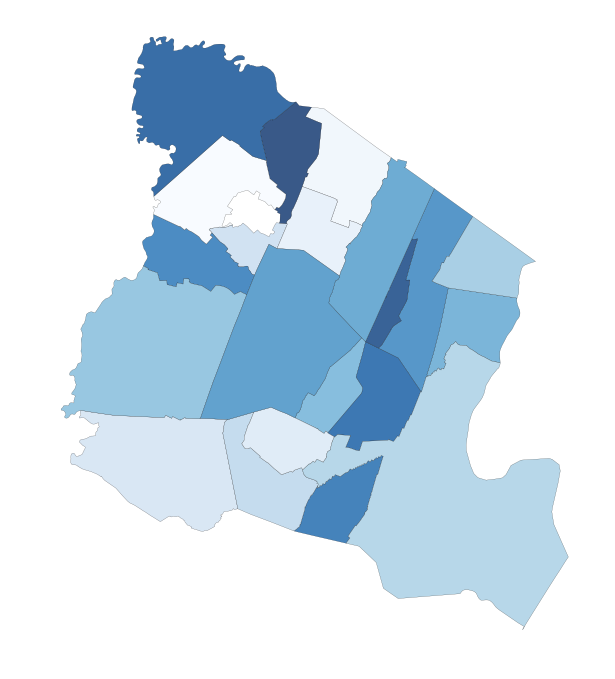

In [43]:
fig = pl.figure(figsize=(10,12))
ax = fig.add_subplot(111)
Essex.plot(ax=ax, column= 'P001001', cmap='Blues',
              edgecolor='k', linewidth=.2, alpha=0.8)
tmp = ax.axis('off')

In [195]:
Essex.ALAND.sum()

323508079